In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
!ls ../raw_data/

holidays_events.csv  sample_submission.csv  test.csv   transactions.csv
oil.csv		     stores.csv		    train.csv


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_data = pd.read_csv('../raw_data/train.csv')
test_data = pd.read_csv('../raw_data/test.csv')
holiday_data = pd.read_csv('../raw_data/holidays_events.csv')
oil_data = pd.read_csv('../raw_data/oil.csv')

stores_data = pd.read_csv('../raw_data/stores.csv')
transactions_data = pd.read_csv('../raw_data/transactions.csv')

Date is an object (Convert datetime)

# Train data

In [11]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [40]:
train_data['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [17]:
train_data.count()

id             3000888
date           3000888
store_nbr      3000888
family         3000888
sales          3000888
onpromotion    3000888
dtype: int64

In [18]:
test_data.count()

id             28512
date           28512
store_nbr      28512
family         28512
onpromotion    28512
dtype: int64

In [103]:
train_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

## `onpromotion` ? (Value - onpromotion)

In [16]:
train_data['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

## `family`

In [39]:
len(train_data['family'].unique())

33

In [33]:
train_data['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [106]:
len(train_data['family'].unique())

33

In [ ]:
# nb_prod / family

# nb_sales / family



<AxesSubplot:xlabel='sales', ylabel='family'>

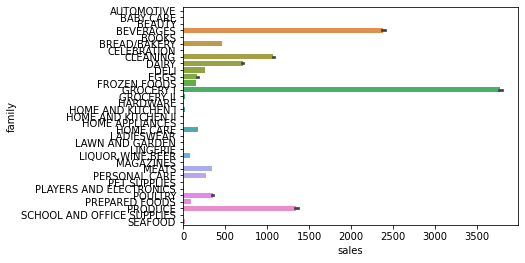

In [108]:
sns.barplot(x='sales', y='family', data=train_data)

### nb_sales / family

In [116]:
# nb_sales / family
by_family = train_data[['family', 'sales']].groupby(by='family').sum()['sales'].sort_values(ascending=False)
pd.DataFrame(by_family)

,sales
family,
GROCERY I,3.434627e+08
BEVERAGES,2.169545e+08
PRODUCE,1.227047e+08
CLEANING,9.752129e+07
DAIRY,6.448771e+07
BREAD/BAKERY,4.213395e+07
POULTRY,3.187600e+07
MEATS,3.108647e+07
PERSONAL CARE,2.459205e+07


**By `store_nbr` and `family`**

In [120]:
by_family = train_data[['store_nbr', 'family', 'sales']].groupby(['store_nbr', 'family'])\
                                                        .sum()['sales'].sort_values(ascending=False)
pd.DataFrame(by_family)

,,sales
store_nbr,family,
44,GROCERY I,1.638606e+07
45,GROCERY I,1.634975e+07
47,GROCERY I,1.551453e+07
46,GROCERY I,1.434226e+07
44,BEVERAGES,1.341786e+07
...,...,...
12,BOOKS,0.000000e+00
18,BOOKS,0.000000e+00
44,BABY CARE,0.000000e+00


In [124]:
by_family2 = train_data[['store_nbr', 'family', 'sales']].sort_values('sales', ascending=False)\
                                                        .groupby(['store_nbr', 'family'])\
                                                        .sum()['sales']
pd.DataFrame(by_family2)

sales
store_nbr family                                  
1         AUTOMOTIVE                  5.475000e+03
          BABY CARE                   0.000000e+00
          BEAUTY                      4.056000e+03
          BEVERAGES                   2.673769e+06
          BOOKS                       2.110000e+02
...                                            ...
54        POULTRY                     8.888981e+04
          PREPARED FOODS              1.030900e+05
          PRODUCE                     5.961803e+05
          SCHOOL AND OFFICE SUPPLIES  1.023000e+03
          SEAFOOD                     2.938000e+03

[1782 rows x 1 columns]

In [125]:
by_family = train_data[['store_nbr', 'family', 'sales']].groupby(by='store_nbr')\
                                                        .sum()['sales'].sort_values(ascending=False)
pd.DataFrame(by_family)

,sales
store_nbr,
44,6.208755e+07
45,5.449801e+07
47,5.094831e+07
3,5.048191e+07
49,4.342010e+07
46,4.189606e+07
48,3.593313e+07
51,3.291149e+07
8,3.049429e+07


# Oil data

In [19]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


Date is a object (Convert datetime)

In [21]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


# Holiday data

In [22]:
holiday_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


## `type`

In [23]:
holiday_data['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [25]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


## `locale`

In [24]:
holiday_data['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

## `locale_name`

In [45]:
len(holiday_data['locale_name'].unique())

24

In [46]:
holiday_data['locale_name'].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

# Stores data

In [26]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


## `type`

In [27]:
stores_data['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

we have 54 stores in total

In [55]:
len(stores_data)

54

### Countplot y='type'

In [60]:
stores_data.groupby(by='type').count()[['store_nbr']]

,store_nbr
type,
A,9
B,8
C,15
D,18
E,4


<AxesSubplot:xlabel='count', ylabel='type'>

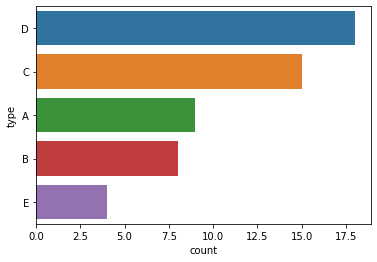

In [77]:
sns.countplot(y='type', data=stores_data, order=stores_data['type'].value_counts().index)

## `state`

In [47]:
len(stores_data['state'].unique())

16

In [32]:
stores_data['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [61]:
stores_data.groupby(by='state').count()[['store_nbr']]

,store_nbr
state,
Azuay,3
Bolivar,1
Chimborazo,1
Cotopaxi,2
El Oro,2
Esmeraldas,1
Guayas,11
Imbabura,1
Loja,1


### Countplot y='state'

<AxesSubplot:xlabel='count', ylabel='state'>

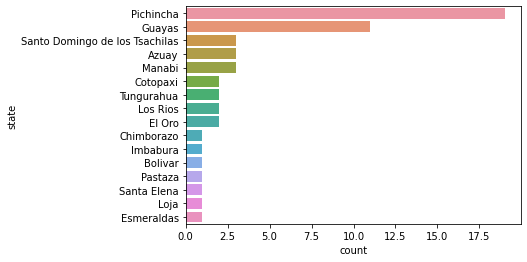

In [75]:
sns.countplot(y='state', data=stores_data, order=stores_data['state'].value_counts().index)

## `city`

In [48]:
len(stores_data['city'].unique())

22

In [31]:
stores_data['city'].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

### by `city`

In [94]:
by_city = stores_data[['store_nbr', 'city']].groupby(by='city')\
                                    .count()['store_nbr']\
                                    .sort_values(ascending=False)
pd.DataFrame(by_city)

,store_nbr
city,
Quito,18
Guayaquil,8
Santo Domingo,3
Cuenca,3
Manta,2
Machala,2
Latacunga,2
Ambato,2
Guaranda,1


## `cluster`
(To review later)

In [100]:
# stores_data['cluster'].unique()

In [101]:
# stores_data[['store_nbr', 'cluster']].groupby(by='cluster').count()

In [102]:
# train_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

# Transactions data

In [29]:
transactions_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


Date is an object (Convert datetime)

In [30]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
